# The Sparks Foundation GRIP Task-2

## Prediction Using Unsupervised Machine Learning

### Author: Shreeya Shah

#### Objective - Predict the optimum number of clusters from the given 'Iris' dataset and represent it visually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [8]:
idata = pd.read_csv("C:/Users/13shr/Documents/Iris.csv")
idata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
idata.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Checking if any null values are present
idata.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Counting each species present in the dataset
idata.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**Rescaling the data**

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_column = scaler.fit_transform(idata.drop(['Id','Species'],axis=1))
scaled_column.shape

(150, 4)

### Finding optimal number of clusters

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

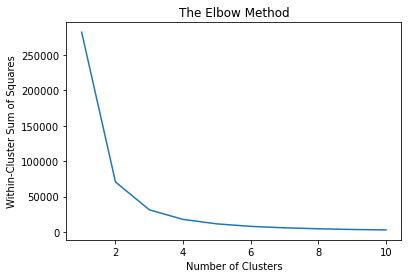

In [16]:
# The Elbow Curve
x = idata.iloc[:,[0, 1, 2, 3]].values
wcss= []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [17]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_column)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(scaled_column, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.3882779720919106
For n_clusters=5, the silhouette score is 0.34478573455929096
For n_clusters=6, the silhouette score is 0.33454884565426873
For n_clusters=7, the silhouette score is 0.328310460362515
For n_clusters=8, the silhouette score is 0.33865475752786217


### Hierarchical Clustering

In [18]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

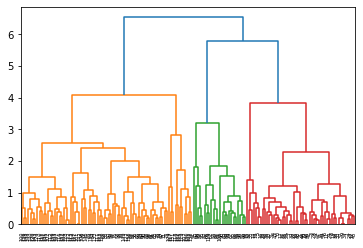

In [19]:
dd = linkage(scaled_column, method='complete', metric='euclidean')
dendrogram(dd)
plt.show()

Hence it can be seen from the dendogram that there are 3 sets of clusters

In [21]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(scaled_column)
y_kmeans_predict = y_kmeans.predict(scaled_column)
y_kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:
centers = kmeans.cluster_centers_

### Visualisation

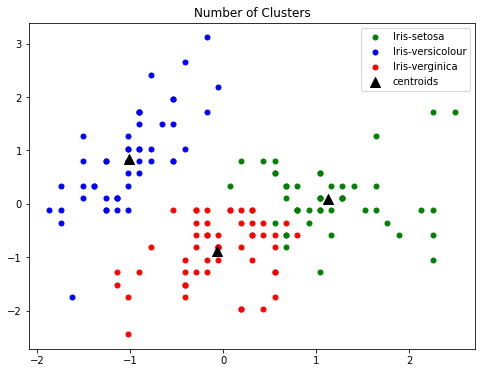

In [27]:
# Representing the Clusters for Visualisation
plt.figure(figsize=(8,6))
plt.scatter(scaled_column[y_kmeans_predict ==0,0], scaled_column[y_kmeans_predict ==0,1], s=100, marker='.', c='green', 
label='Iris-setosa')
plt.scatter(scaled_column[y_kmeans_predict ==1,0], scaled_column[y_kmeans_predict ==1,1], s=100, marker='.', c='blue',
label = 'Iris-versicolour')    
plt.scatter(scaled_column[y_kmeans_predict ==2,0], scaled_column[y_kmeans_predict ==2,1], s=100, marker='.', c='red',
label = 'Iris-verginica')  
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker='^', c='black', label= 'centroids')
plt.title('Number of Clusters')
plt.legend()
plt.show()

**Conclusion**

In [ ]:
The optimal number of clusters for this dataset is 3.